In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# Plotly imports
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

#Initial Data Analysis

In [2]:
wine_df = pd.read_csv('winequalityN.csv')

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Attribute Information:

Input variables (based on physicochemical tests):


1.  fixed acidity
2.  volatile acidity
3.  citric acid
4.  residual sugar
5.  chlorides
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10.  sulphates
11.  alcohol

Output variable (based on sensory data):
12.  quality (score between 0 and 10)


# Data Preparation

## Data Types

In [4]:
categorical = ['type']
numerical = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [5]:
for col in categorical:
    arr = wine_df[col].unique()
    wine_df[col] = wine_df[col].astype('category')

type is the only categorical variable with possible values: "white" or "red"

## Missing values

In [6]:
wine_df.isnull().sum()

def get_missing_data(dataFrame):
    percent_missing = dataFrame.isnull().sum() * 100 / len(dataFrame)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

missing_values_df = get_missing_data(wine_df)
print(missing_values_df)

                      percent_missing
type                         0.000000
fixed acidity                0.153917
volatile acidity             0.123134
citric acid                  0.046175
residual sugar               0.030783
chlorides                    0.030783
free sulfur dioxide          0.000000
total sulfur dioxide         0.000000
density                      0.000000
pH                           0.138525
sulphates                    0.061567
alcohol                      0.000000
quality                      0.000000


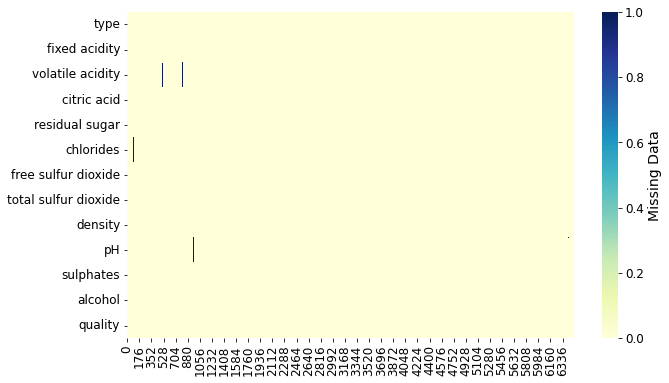

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(wine_df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

All missing values are very low percentage in numerical features. We will fill the null values with the mean for each attribute.

In [7]:
for i in numerical:
  wine_df[i] = wine_df[i].fillna(wine_df[i].mean())

wine_df.info()

missing_values_df = get_missing_data(wine_df)
print(missing_values_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   category
 1   fixed acidity         6497 non-null   float64 
 2   volatile acidity      6497 non-null   float64 
 3   citric acid           6497 non-null   float64 
 4   residual sugar        6497 non-null   float64 
 5   chlorides             6497 non-null   float64 
 6   free sulfur dioxide   6497 non-null   float64 
 7   total sulfur dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6497 non-null   float64 
 10  sulphates             6497 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB
                      percent_missing
type     

# Data Analysis

As we will be predicting which is red or white wine let us compare the features between them.

In [ ]:
wine_red = wine_df[wine_df["type"] == "red"].copy()

wine_white = wine_df[wine_df["type"] == "white"].copy()

red_wine_stats = pd.DataFrame({"Red Wine Stats" : wine_red.describe().loc["mean"]})


In [ ]:
red_wine_stats.head()

,Red Wine Stats
fixed acidity,8.320721
volatile acidity,0.527620
citric acid,0.271175
residual sugar,2.538806
chlorides,0.087467


In [ ]:
white_wine_stats = pd.DataFrame({"White Wine Stats" : wine_white.describe().loc["mean"]})

In [ ]:
red_wine_stats = red_wine_stats.merge(white_wine_stats, on = red_wine_stats.index)
red_wine_stats


,key_0,Red Wine Stats,White Wine Stats
0,fixed acidity,8.320721,6.856121
1,volatile acidity,0.527620,0.278340
2,citric acid,0.271175,0.334244
3,residual sugar,2.538806,6.392862
4,chlorides,0.087467,0.045783
5,free sulfur dioxide,15.874922,35.308085
6,total sulfur dioxide,46.467792,138.360657
7,density,0.996747,0.994027
8,pH,3.310748,3.188246
9,sulphates,0.657919,0.489851


In [ ]:
red_wine_stats.drop(red_wine_stats[red_wine_stats["key_0"] == "total sulfur dioxide"].index, inplace = True)

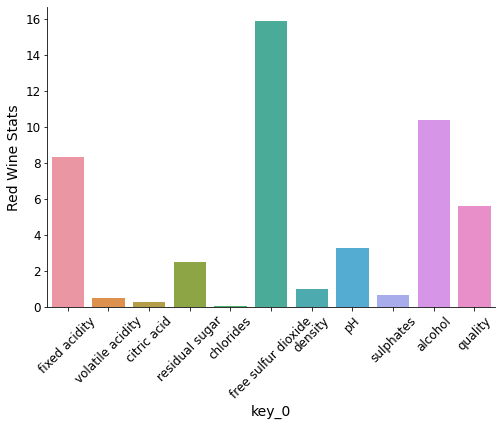

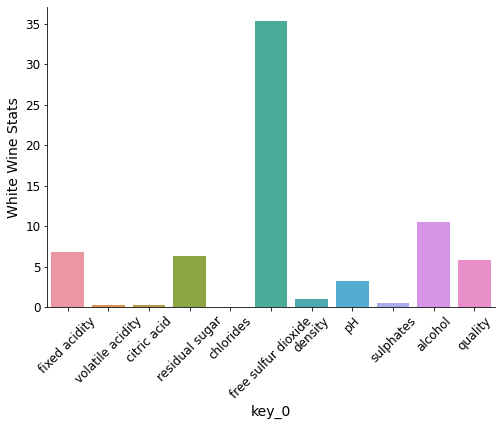

In [ ]:


g1 = sns.catplot(x = 'key_0', y='Red Wine Stats',data=red_wine_stats, 
            kind='bar',height=5, aspect=11.7/8.27)

g2 = sns.catplot(x = 'key_0', y='White Wine Stats',data=red_wine_stats, 
            kind='bar',height=5, aspect=11.7/8.27)


g1.set_xticklabels(rotation = '45')

g2.set_xticklabels(rotation = '45')

#Need to fix the graph later

In [ ]:

# for attribute in numerical:
#   sns.catplot(data=wine_df, x=attribute, y="quality", hue="type", height=5)

Features such as the  total sulfur dioxide, residual sugar, fixed acidity and volatile acidity differs greatly between red and white wine.

## Class Balance


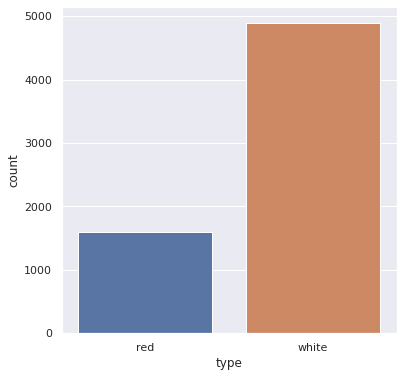

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})

sns.countplot(data = wine_df, x = 'type')

We can see that wine type 'white' is not balanced with 'red'. This might not represent an issue in our analysis and modeling but it will be worth to compare if having a more equally distributed sampling will generate a different result in our classifiers.

## Wine Quality

Let us shift our focus to Wine quality and how the wine's properties determine the quality.

### Red Wine

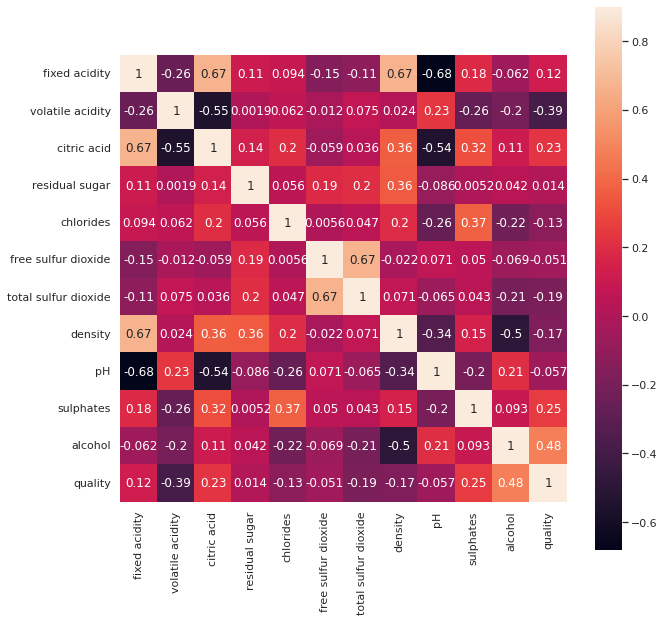

In [ ]:
corrmat = wine_red.corr()

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corrmat, vmax=0.9, square = True, annot=True, ax = ax)

### White Wine

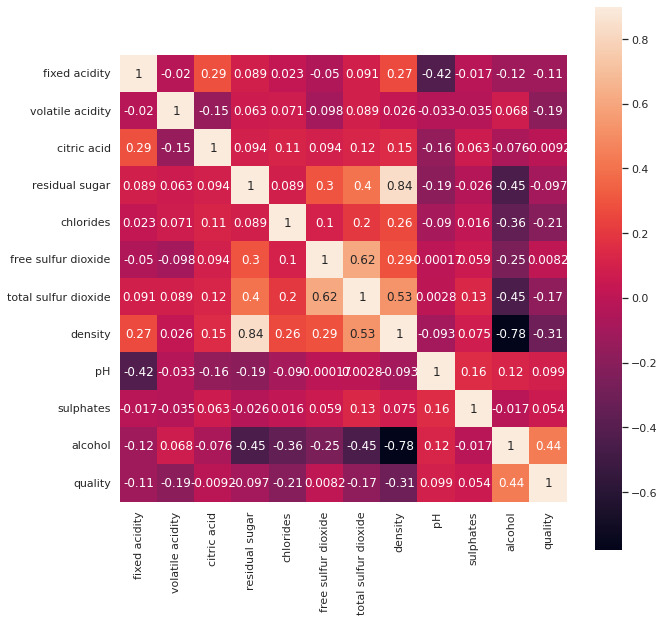

In [ ]:
corrmat = wine_white.corr()

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corrmat, vmax=0.9, square = True, annot=True, ax = ax)

Volatile acidity seems to be well correlated with the red wine quality

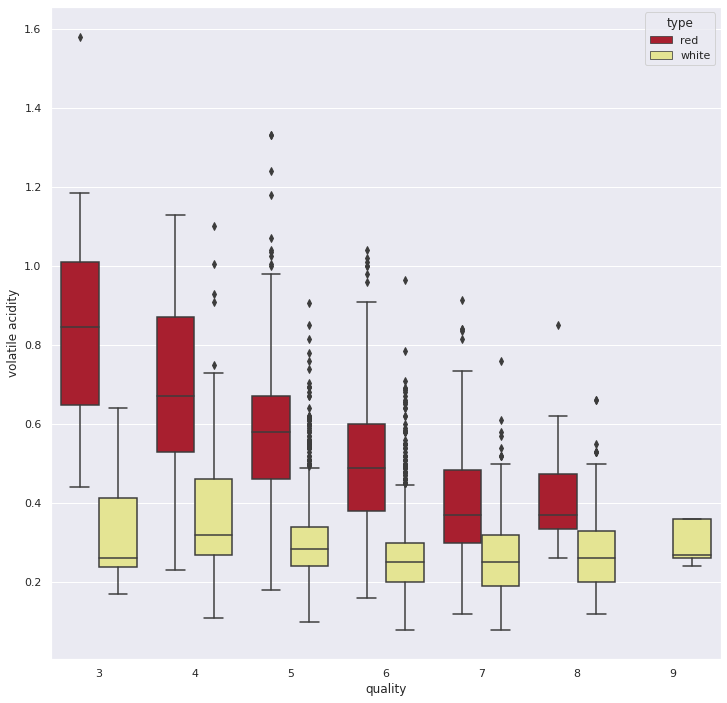

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  

colours = ["#bf081d", "#f1f285"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(data = wine_df, x = "quality", y = "volatile acidity" , hue = "type", ax = ax)

We can see that for red wine the volatile acidity differs a lot for different quality whereas for white wine it is similar. 

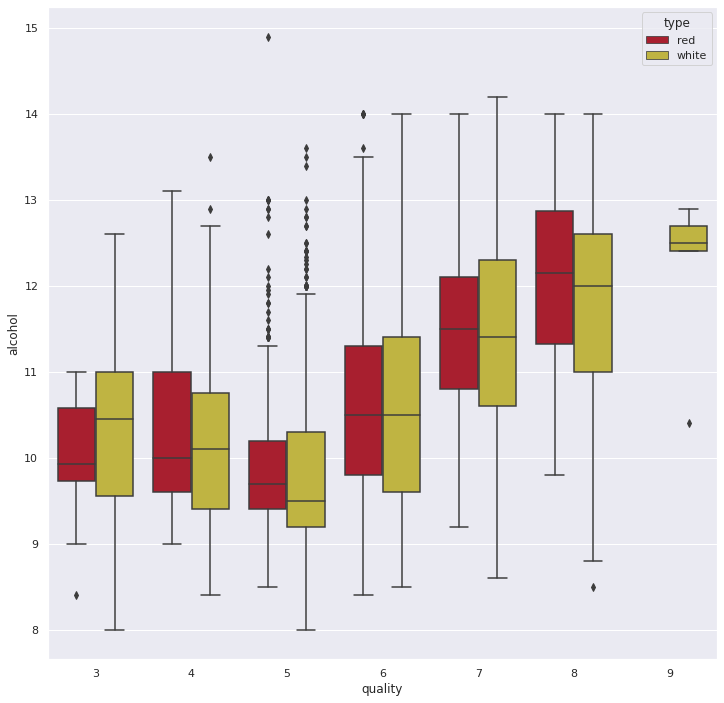

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  

colours = ["#bf081d", "#d4c52d"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(data = wine_df, x = "quality", y = "alcohol" , hue = "type", ax = ax)

Acidity seems to play an important role in the wine quality, so let us put pH(low value is higher acidity) and fixed acidity

do a feature eng with acidity  x ph x volatile aciyd vs alcohol

Let us observe our top most highly correlated features with wine quality in one scatter plot and analyze which values gives better quality wine.

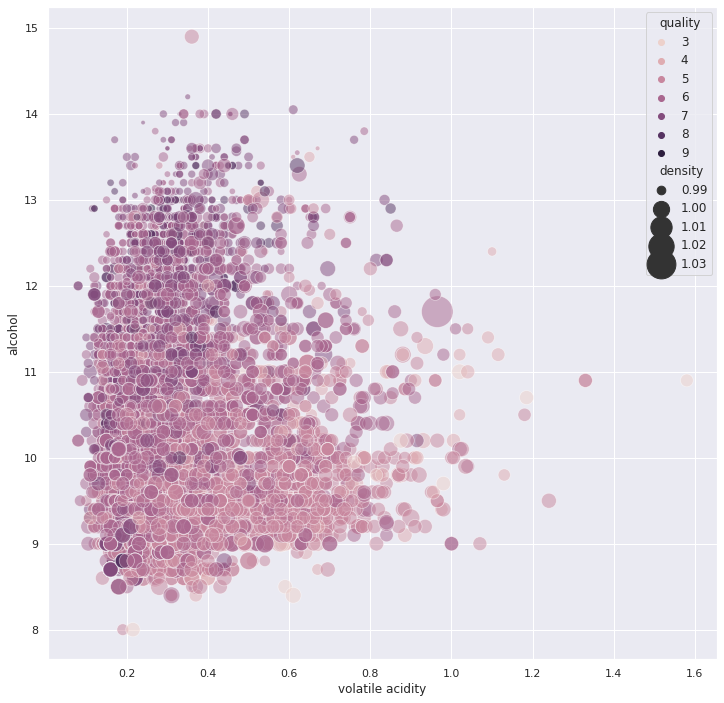

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))  
#sizes=(20, 1000),
sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data = wine_df, x = "volatile acidity", y = "alcohol", hue = "quality", alpha=0.5, size = 'density' , sizes = (20, 1000))

Feature fixed acidity has skewness 1.7237332100228064
Feature volatile acidity has skewness 1.4960872382618045
Feature citric acid has skewness 0.47303238175058926
Feature residual sugar has skewness 1.434889280399139
Feature chlorides has skewness 5.399432733792378
Feature free sulfur dioxide has skewness 1.219784372282318
Feature total sulfur dioxide has skewness -0.001177206365785478
Feature density has skewness 0.5034854532378842
Feature pH has skewness 0.38714470176958515
Feature sulphates has skewness 1.7986052869527671
Feature alcohol has skewness 0.5655871101918292
Feature quality has skewness 0.18957891127582205


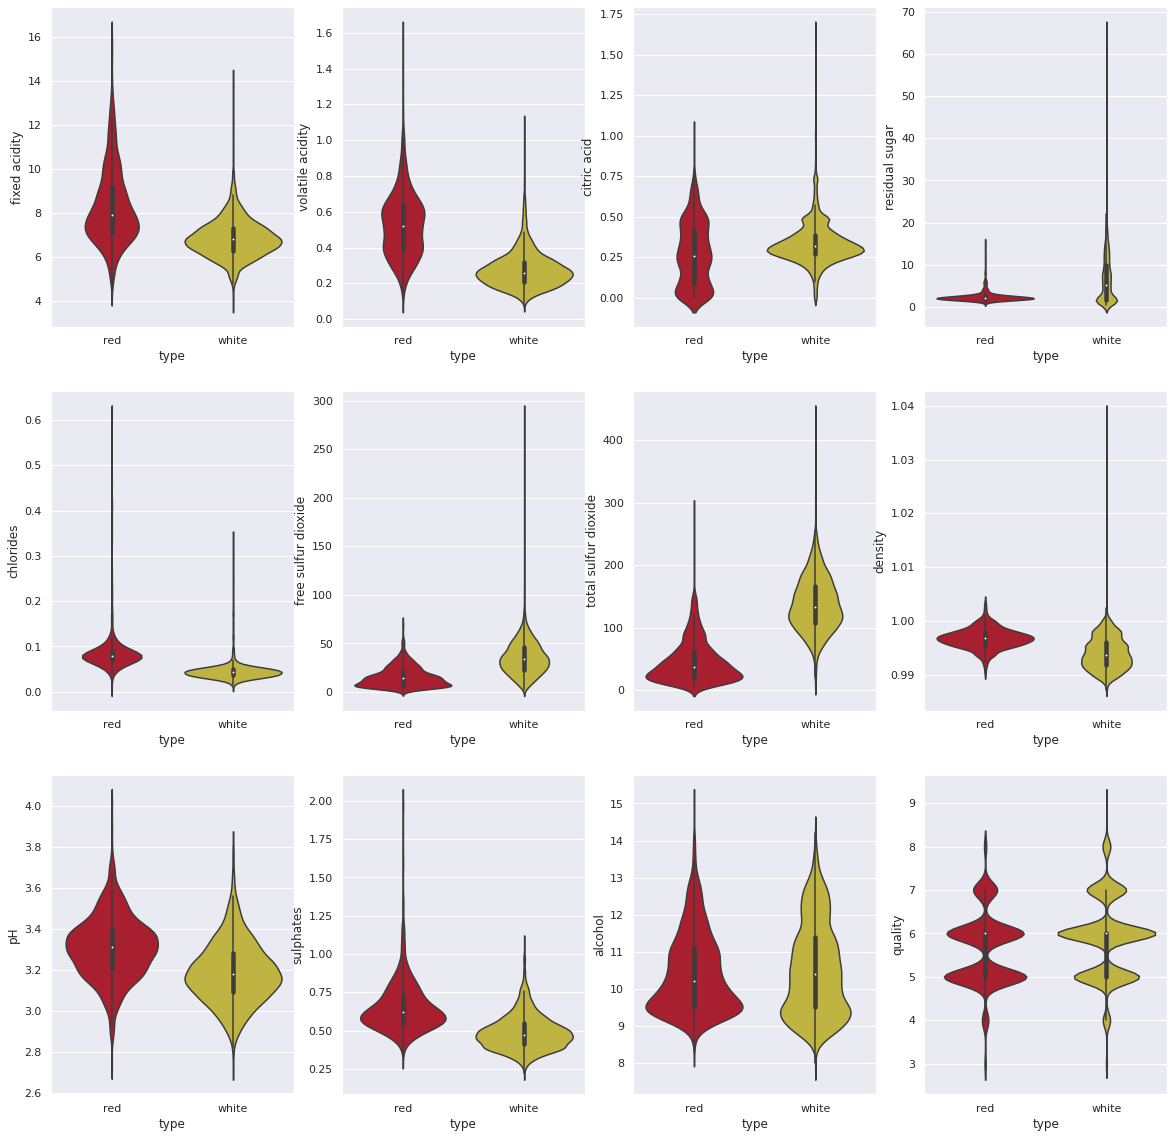

In [ ]:
from scipy.stats import skew


features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# for feature in numerical:
#   sns.boxplot(data = wine_df, y = feature)


fig, axes = plt.subplots(3, 4, figsize=(20,20))

# for i , row in enumerate(axes):
#   i, j = divmod(0, 3)

#   sns.boxplot(data = wine_df, y = features[i], x = 'type', ax = axes[i, j])


for i, ax in enumerate(axes.flat):
    sns.violinplot(data = wine_df, y = features[i], x = 'type', ax = ax)

    sk = skew(wine_df[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))



In [ ]:
def wine_quality(x):

  if x < 5 :
    label = 'Low'
  elif x > 4 and x < 7:
    label = 'Medium'
  else:
    label = "High"

  return label

In [ ]:
wine_df_viz = wine_df.copy()


wine_df_viz["quality_catagory"] = wine_df["quality"].apply(wine_quality)

wine_df_viz.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_catagory
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,Medium
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,Medium
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,Medium
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,Medium
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.660000,11.0,6,Medium


In [ ]:
wine_df_viz.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_catagory
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [ ]:
# features_violin = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# fig_2, axes_2 = plt.subplots(3, 4, figsize=(20,20))


# x_order= ["Low", "Medium", "High"]

# for i, ax in enumerate(axes_2.flat):

#     sns.violinplot(data = wine_df_viz, y = features_violin[i], x = 'quality_catagory',hue = 'type', ax = ax, order =x_order)




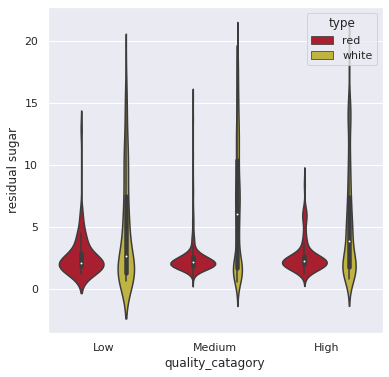

In [ ]:
#a temp df which has the outliers in residual sugar removed
from scipy import stats

x_order= ["Low", "Medium", "High"]

res_sugar_outlier_remved = wine_df_viz[(np.abs(stats.zscore(wine_df_viz["residual sugar"])) < 3)]


wine_df_viz[(np.abs(stats.zscore(wine_df_viz["residual sugar"])) < 3)]

sns.violinplot(data = res_sugar_outlier_remved, y = "residual sugar" , x = 'quality_catagory',hue = 'type', order = x_order)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


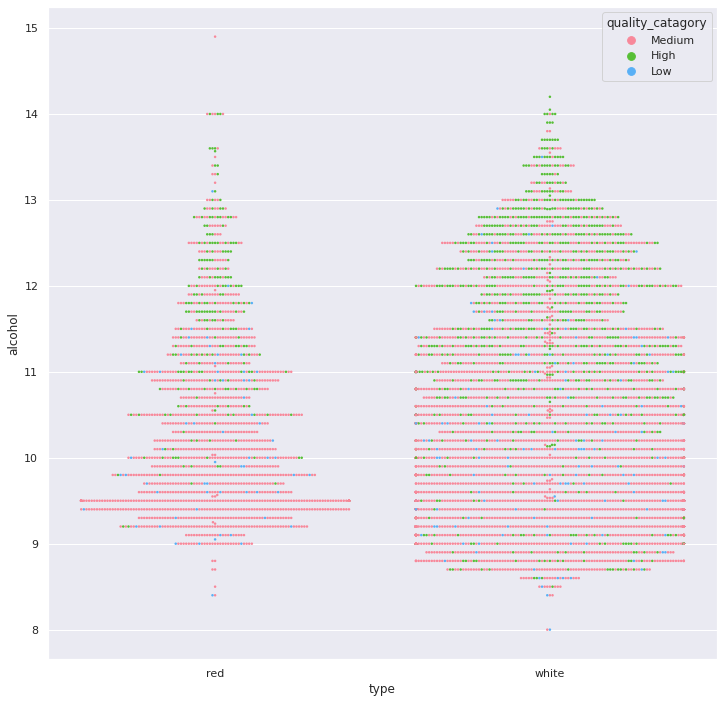

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 



sns.swarmplot(x = 'type', y = 'alcohol', data = wine_df_viz, hue = 'quality_catagory', size = 2.5)

# Modeling

## Wine Type Modeling

## Evaluate Different Models

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

In [9]:
wine_df_copy = wine_df.copy()

labelEncoder = LabelEncoder()
wine_df_copy['type'] = labelEncoder.fit_transform(wine_df_copy['type'])

# # 1. Split data
# # 70% -> Training and cross validation
# # 30% -> Testing
y = wine_df_copy["type"]
X = wine_df_copy.drop(['type'], axis = 1)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

wine_num_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(numerical)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", MinMaxScaler())
])

full_pipeline = ColumnTransformer([
    ("numerical", wine_num_pipeline, numerical)
])

### Decision Tree Classifier

In [11]:
dtclf = DecisionTreeClassifier()

dtclf_pipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('dtclf', dtclf)
])

dtclf_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('selector',
                                                                   OldDataFrameSelector(attribute_names=['fixed '
                                                                                                         'acidity',
                                                                                                         'volatile '
                                                                                                         'acidity',
                                                                                                         'citric '
                                                                                                         'acid',
                                                                                                         'residual '
                

In [12]:
def performGridSearch(pipeline, params, scoring, X_tr_, y_tr_, X_te_, y_te_):
  grid = GridSearchCV(pipeline, params, cv=5, scoring=scoring)
  grid.fit(X_tr_, y_tr_)

  print('Best score', grid.best_score_)
  print('Best params', grid.best_params_)

  y_pred = grid.best_estimator_.predict(X_te_)
  print(classification_report(y_te_, y_pred))


param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [3, 4, 5],
              "dtclf__min_samples_split": [0.05, 0.1, 0.25],
              "dtclf__min_samples_leaf": [1,2,3],
              "dtclf__max_leaf_nodes": [None,2, 9]}

performGridSearch(dtclf_pipe, param_dist, 'accuracy', X_tr, y_tr, X_te, y_te)

Best score 0.9707525477822507
Best params {'dtclf__criterion': 'gini', 'dtclf__max_depth': 4, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 2, 'dtclf__min_samples_split': 0.05}
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       477
           1       0.98      0.98      0.98      1473

    accuracy                           0.97      1950
   macro avg       0.96      0.96      0.96      1950
weighted avg       0.97      0.97      0.97      1950



We can see we have a good accuracy score of 0.970 with the initial parameters. We now proceed to do some tunning to see if we can find better parameters. We will change the param_dist dictionary and observe the accuracy score

In [13]:
param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [2, 3, 5, 10],
              "dtclf__min_samples_split": [0.01, 0.05, 0.07],
              "dtclf__min_samples_leaf": [1,2,3],
              "dtclf__max_leaf_nodes": [None,2]}

performGridSearch(dtclf_pipe, param_dist, 'accuracy', X_tr, y_tr, X_te, y_te)

Best score 0.9843861748812245
Best params {'dtclf__criterion': 'gini', 'dtclf__max_depth': 5, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 3, 'dtclf__min_samples_split': 0.01}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       477
           1       0.98      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.97      1950
weighted avg       0.98      0.98      0.98      1950



In [14]:
param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [10, 50, 100],
              "dtclf__min_samples_split": [0.005, 0.01, 0.05],
              "dtclf__min_samples_leaf": [1,2,3],
              "dtclf__max_leaf_nodes": [None,2]}

performGridSearch(dtclf_pipe, param_dist, 'accuracy', X_tr, y_tr, X_te, y_te)

Best score 0.9846059551010047
Best params {'dtclf__criterion': 'gini', 'dtclf__max_depth': 10, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 1, 'dtclf__min_samples_split': 0.005}
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       477
           1       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [15]:
param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [20, 30, 40],
              "dtclf__min_samples_split": [0.008, 0.01, 0.02],
              "dtclf__min_samples_leaf": [1,2],
              "dtclf__max_leaf_nodes": [None,2]}

performGridSearch(dtclf_pipe, param_dist, 'accuracy', X_tr, y_tr, X_te, y_te)

Best score 0.9846059551010047
Best params {'dtclf__criterion': 'gini', 'dtclf__max_depth': 20, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 1, 'dtclf__min_samples_split': 0.01}
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       477
           1       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



After a few runs we have obtained a better accuracy score 0.984, the most tunned parameters are:
* 'dtclf__criterion': 'gini', 
* 'dtclf__max_depth': 6, 
* 'dtclf__max_leaf_nodes': None, 
* 'dtclf__min_samples_leaf': 1, 
* 'dtclf__min_samples_split': 0.001

### Decision Tree Classifier- Extended
Now we try the same classifier and the most optimal parameters but with the F1-Score

In [16]:
param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [1, 10, 20, 30],
              "dtclf__min_samples_split": [0.008, 0.01, 0.02],
              "dtclf__min_samples_leaf": [1,2],
              "dtclf__max_leaf_nodes": [None,2]}

performGridSearch(dtclf_pipe, param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.9789212678182677
Best params {'dtclf__criterion': 'gini', 'dtclf__max_depth': 20, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 2, 'dtclf__min_samples_split': 0.008}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       477
           1       0.98      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.97      0.97      1950
weighted avg       0.98      0.98      0.98      1950



### Decision Tree - Further Tuning and Plotting

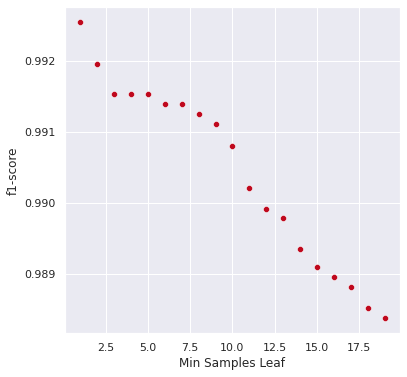

In [ ]:
from sklearn.metrics import f1_score

#create empty list for scores

scores_leaf = []

min_samples_leaves = [i for i in range(1, 20)]

dtclf = DecisionTreeClassifier()

#loop through different sample leaf value  while other params are kept constant at their optimum value

for min_sample_leaf in min_samples_leaves:
    
    param_dist_plot = {"criterion": "gini",
              "max_depth": 20,
              "min_samples_split": 0.01,
              "min_samples_leaf": min_sample_leaf,
              "max_leaf_nodes": None}

    dtclf.set_params(**param_dist_plot)
    
    dtclf.fit(X_tr, y_tr)
    
    scores_leaf.append(f1_score(y_tr,dtclf.predict(X_tr)))
    
## Plot the sample leaves vs f1-score

g1 = sns.scatterplot(x = min_samples_leaves, y =  scores_leaf)
g1.set(xlabel = 'Min Samples Leaf', ylabel = 'f1-score')

plt.show()

### Decision Tree - Synthetic Minority Oversampling Technique (SMOTE)
We decided to add Smote to understand if a more proportionate distribution in the wine types will give us a better result in the estimation

In [17]:
from imblearn.over_sampling import SMOTE

param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [1, 10, 20, 30],
              "dtclf__min_samples_split": [0.008, 0.01, 0.02],
              "dtclf__min_samples_leaf": [1,2],
              "dtclf__max_leaf_nodes": [None,2]}

smote_ratios = [0.4, 0.5, 0.6, 0.7, 0.8, 1]

for ratio in smote_ratios:
  sm = SMOTE(sampling_strategy=ratio, random_state=42)
  X_res, y_res = sm.fit_resample(X_tr, y_tr)

  dtclf_pipe.fit(X_res, y_res)

  print('Applying SMOTE with ratio ', ratio)
  performGridSearch(dtclf_pipe, param_dist, 'f1_macro', X_res, y_res, X_te, y_te)

Applying SMOTE with ratio  0.4
Best score 0.9772114490536952
Best params {'dtclf__criterion': 'entropy', 'dtclf__max_depth': 20, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 2, 'dtclf__min_samples_split': 0.01}
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       477
           1       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950

Applying SMOTE with ratio  0.5
Best score 0.9769024546929028
Best params {'dtclf__criterion': 'entropy', 'dtclf__max_depth': 10, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 2, 'dtclf__min_samples_split': 0.01}
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       477
           1       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macr

After applying SMOTE we see that the score remains better with the original distribution of the wine types. 

The best score while using SMOTE was: 0.9846715164350565 with a ratio of 0.6. With the following parameters:
* 'dtclf__criterion': 'entropy', 
* 'dtclf__max_depth': 20, 
* 'dtclf__max_leaf_nodes': None, 
* 'dtclf__min_samples_leaf': 1, 
* 'dtclf__min_samples_split': 0.008 

### Decision Tree - Adaptive Synthetic sampling approach (ADASYN)

In [18]:
from imblearn.over_sampling import ADASYN

param_dist = {"dtclf__criterion": ["gini", "entropy"],
              "dtclf__max_depth": [1, 10, 20, 30],
              "dtclf__min_samples_split": [0.008, 0.01, 0.02],
              "dtclf__min_samples_leaf": [1,2],
              "dtclf__max_leaf_nodes": [None,2]}

adasyn_ratios = [0.4, 0.5, 0.6, 0.7, 0.8, 1]

for ratio in adasyn_ratios:
  adas = ADASYN(sampling_strategy= ratio, random_state=42)
  X_res, y_res = adas.fit_resample(X_tr, y_tr)

  dtclf_pipe.fit(X_res, y_res)
  print('Applying ADASYN with ratio ', ratio)
  performGridSearch(dtclf_pipe, param_dist, 'f1', X_res, y_res, X_te, y_te)

Applying ADASYN with ratio  0.4
Best score 0.9844199563939873
Best params {'dtclf__criterion': 'entropy', 'dtclf__max_depth': 10, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 2, 'dtclf__min_samples_split': 0.008}
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       477
           1       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950

Applying ADASYN with ratio  0.5
Best score 0.9828651094485081
Best params {'dtclf__criterion': 'entropy', 'dtclf__max_depth': 10, 'dtclf__max_leaf_nodes': None, 'dtclf__min_samples_leaf': 1, 'dtclf__min_samples_split': 0.008}
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       477
           1       0.99      0.98      0.99      1473

    accuracy                           0.98      1950
   

After applying these two techniques to balance the sampling of the wine types, we cannot improve the score that was returned by the original sample. 

The best score while using ADASYN was: 0.9844199563939873 for a ratio of 0.4. With the following parameters:
* 'dtclf__criterion': 'entropy', 
* 'dtclf__max_depth': 10, 
* 'dtclf__max_leaf_nodes': None, 
* 'dtclf__min_samples_leaf': 2, 
* 'dtclf__min_samples_split': 0.008

### Decision Tree Classifier - Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #bring to 2 features
X_tr_pca = pca.fit_transform(X_tr)

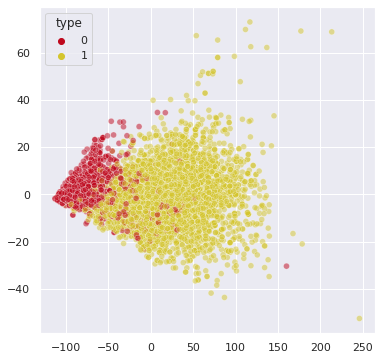

In [ ]:
sns.scatterplot(x= X_tr_pca[:,0],y = X_tr_pca[:,1], hue = y_tr, alpha = 0.5)

In [ ]:
dtclf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
feature_dims = [i for i in range(2,11)]

param_dist = {"criterion": ["gini", "entropy"],
              "max_depth": [5, 6, 7],
              "min_samples_split": [0.001, 0.002],
              "min_samples_leaf": [1,2,3],
              "max_leaf_nodes": [None,2]}

for n in feature_dims:
  pca = PCA(n_components=n) #bring to n features
  X_tr_pca = pca.fit_transform(X_tr)

  dtclf.fit(X_tr_pca, y_tr)
  print('Applying PCA with', n, 'features')
  performGridSearch(dtclf, param_dist, 'f1', X_tr_pca, y_tr, X_te, y_te)

Applying PCA with 2 features
Best score 0.955903026849317
Best params {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 0.001}


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

Using PCA we can see in the scatterplot that there are some overlap of red wine white wine, we can also see that the accuracy is slightly less compared to the accuracy without using PCA hence we do not need to implement it.

### Decision Tree Scores evaluation

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

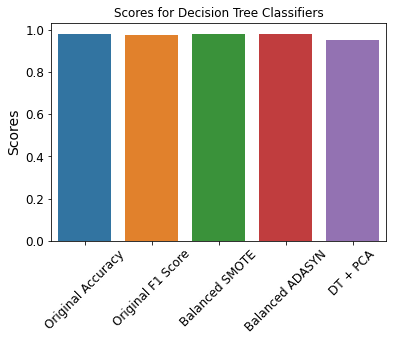

In [22]:
dt_f1_score_list = [0.9846, 0.9789, 0.984, 0.984, 0.955]

names = ['Original Accuracy', 'Original F1 Score', 'Balanced SMOTE', 'Balanced ADASYN', 'DT + PCA']

sns.color_palette("deep")

g4 = sns.barplot(x = names, y = dt_f1_score_list).set(title='Scores for Decision Tree Classifiers', ylabel='Scores')

# g4.set( ylabel='Scores')

plt.xticks(rotation = '45')

### KNeighbors Classifier

In [ ]:
knn_param_dist = {
    'knnclf__n_neighbors': [3, 4, 5, 6, 7, 11, 19],
    'knnclf__weights': ['uniform', 'distance'],
    'knnclf__metric': ['minkowski', 'euclidean', 'manhattan']
}

knn_clf = KNeighborsClassifier()
knnpipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('knnclf', knn_clf)
])

knnpipe.fit(X_tr, y_tr)

performGridSearch(knnpipe, knn_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.9943666763335648
Best params {'knnclf__metric': 'manhattan', 'knnclf__n_neighbors': 6, 'knnclf__weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       477
           1       1.00      1.00      1.00      1473

    accuracy                           1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950



### KNeighbors- Further tuning and Plotting

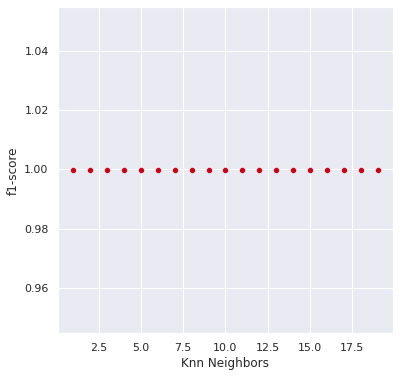

In [ ]:


scores_neighbors = []

neighbors = [i for i in range(1, 20)]

knn_clf = KNeighborsClassifier()

for neighbor in neighbors:
    
        knn_param_dist = {
        'n_neighbors': neighbor,
        'weights': 'distance',
        'metric': 'manhattan'}
        
        knn_clf.set_params(**knn_param_dist)
    
        knn_clf.fit(X_tr, y_tr)
    
        scores_neighbors.append(round(f1_score(y_tr,knn_clf.predict(X_tr)), 5))

    

g2 = ax_n = sns.scatterplot(x = neighbors, y =  scores_neighbors)

g2.set(xlabel = 'Knn Neighbors', ylabel = 'f1-score')

plt.show()

The KNNeighbors classifier has the best results so far (0.997228720699083) after the decision tree without resampling (0.9902497678331645)

* 'knnclf__metric': 'manhattan', 
* 'knnclf__n_neighbors': 6, 
* 'knnclf__weights': 'distance'

### Random Forest Classifier

In [ ]:
rf_param_dist = {
    "rfclf__n_estimators": [1, 10, 50, 75, 100], 
    "rfclf__max_leaf_nodes": [None, 1, 10, 50]
}

rdn_clf = RandomForestClassifier()

rdnpipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('rfclf', rdn_clf)
])

rdnpipe.fit(X_tr, y_tr)

performGridSearch(rdnpipe, rf_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/

Best score 0.9925748135412951
Best params {'rfclf__max_leaf_nodes': None, 'rfclf__n_estimators': 75}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       477
           1       0.99      1.00      1.00      1473

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



Random Forest Classifier returned similar results to KNN classifier
0.9967923627912997
* 'rfclf__max_leaf_nodes': None, 
* 'rfclf__n_estimators': 75

### Random Forest - Further Tuning and plotting

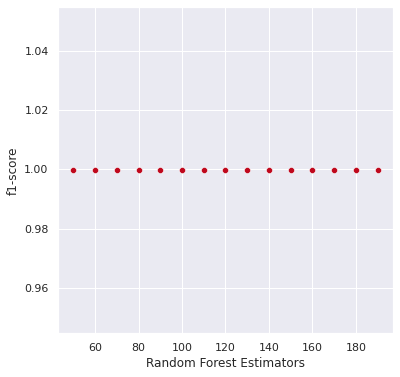

In [ ]:


scores_nestimators = []

nestimators = [i for i in range(50, 200, 10)]

rdn_clf = RandomForestClassifier()

for nestimator in nestimators:
    
    
        rf_param_dist = {
        "n_estimators": nestimator, 
        "max_leaf_nodes": None,
        "random_state": 42}
        
        rdn_clf.set_params(**rf_param_dist)
    
        rdn_clf.fit(X_tr, y_tr)
    
        scores_nestimators.append(f1_score(y_tr,rdn_clf.predict(X_tr)))


    
    

g3 = sns.scatterplot(x = nestimators, y =  scores_nestimators)



g3.set(xlabel = 'Random Forest Estimators', ylabel = 'f1-score')

plt.show()

### Ada Boost Classifier 

In [ ]:
ada_param_dist = {"adaclf__n_estimators": [80, 90, 100, 120, 200, 300], 
              "adaclf__algorithm": ["SAMME", "SAMME.R"],
              "adaclf__learning_rate": [0.4, 0.45, 0.48]}

clf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(clf)

adapipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('adaclf', ada_clf)
])

adapipe.fit(X_tr, y_tr)

performGridSearch(adapipe, ada_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.9940785966124743
Best params {'adaclf__algorithm': 'SAMME.R', 'adaclf__learning_rate': 0.45, 'adaclf__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       477
           1       0.99      1.00      0.99      1473

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



### Ada Boost - Further Tuning and plotting

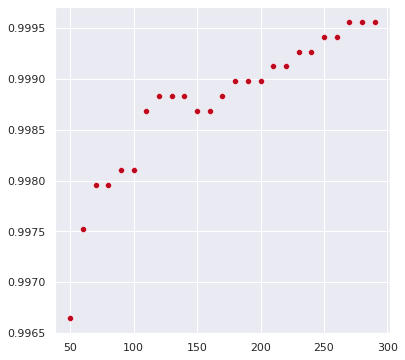

In [ ]:


scores_nestimators_ada = []

nestimators_ada = [i for i in range(50, 300, 10)]

ada_clf = AdaBoostClassifier(clf)

for nestimator_ada in nestimators_ada:
    
    
        ada_param_dist = {"n_estimators": nestimator_ada, 
              "algorithm": "SAMME.R",
              "learning_rate": 0.45}
        
        ada_clf.set_params(**ada_param_dist)
    
        ada_clf.fit(X_tr, y_tr)
    
        scores_nestimators_ada.append(f1_score(y_tr,ada_clf.predict(X_tr)))
    

sns.scatterplot(x = nestimators_ada, y =  scores_nestimators_ada)
    

### Gradient Boosting Classifier

In [ ]:
gbt_param_dist = {"gbtclf__n_estimators": [1, 10, 100, 400, 500, 600],
              "gbtclf__learning_rate": [0.1, 0.2, 0.4],
              "gbtclf__max_features": [4, 5, 6],
              "gbtclf__max_depth": [4, 5, 6]}

gbt_clf = GradientBoostingClassifier()

gbtpipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('gbtclf', gbt_clf)
])

gbtpipe.fit(X_tr, y_tr)

performGridSearch(gbtpipe, gbt_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.9952577955560011
Best params {'gbtclf__learning_rate': 0.1, 'gbtclf__max_depth': 4, 'gbtclf__max_features': 4, 'gbtclf__n_estimators': 500}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       477
           1       0.99      1.00      1.00      1473

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



### Logistic Regression

In [ ]:
log_param_dist = {
    "logreg__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "logreg__penalty": ["l1", "l2" , "elasticnet", "none"]
}

logreg_clf = LogisticRegression()
logregpipe = Pipeline([
    ('full_pipeline', full_pipeline),
    ('logreg', logreg_clf)
])

logregpipe.fit(X_tr, y_tr)

performGridSearch(logregpipe, log_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Best score 0.9937745583002167
Best params {'logreg__penalty': 'none', 'logreg__solver': 'sag'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       477
           1       1.00      1.00      1.00      1473

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Stacking Classifier

Now we build the Stack classifier with the best parameters of all models for all the grid search executed before

In [ ]:
# Models with the best parameters from previous tunning

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=0.008)

knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

rdn_clf = RandomForestClassifier(max_leaf_nodes=None, n_estimators=75)

clf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(clf, algorithm='SAMME.R', learning_rate=0.45, n_estimators=100)

gbt_clf = GradientBoostingClassifier(learning_rate=0.4, max_depth=6, max_features=4, n_estimators=150)

logreg_clf = LogisticRegression(penalty='none', solver='sag')

models = [
    ('dtc', dt_clf),
    ('knn', knn_clf),
    ('rnd', rdn_clf),
    ('ada', ada_clf),
    ('grd', gbt_clf)
]

sclf = StackingClassifier(estimators=models, final_estimator=logreg_clf, cv=5)

classifiers = {
    "DTC": dt_clf,
    "KNN": knn_clf,
    "RDN": rdn_clf,
    "ADA": ada_clf,
    "GRD": gbt_clf,
    "STCLF": sclf
    }


In [ ]:
for key in classifiers:
    classifier = classifiers[key]
    pipe = Pipeline([
      ('full_pipeline', full_pipeline),
      (key, classifiers[key])
    ])
    classifiers[key] = pipe

In [ ]:
# Train classifiers
for key in classifiers:
    classifier = classifiers[key]
    classifier.fit(X_tr, y_tr)
    classifiers[key] = classifier

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Making predictions
results = pd.DataFrame()
for key in classifiers:
    y_pred = classifiers[key].predict(X_te)
    results[f"{key}"] = y_pred

results["target"] = y_te

## F1 Score for all classifiers


In [ ]:
from sklearn import metrics

f1_score_list = []

for key, counter in zip(classifiers, range(6)):
    y_pred = results[key]
    
    f1 = metrics.f1_score(y_te, y_pred, average='macro')
    f1_score_list.append(f1)
    textstr = f"{f1:.3f}"

    print(key, 'Classifier')
    print(textstr, 'F1 Macro Score')

DTC Classifier
0.975 F1 Macro Score
KNN Classifier
0.995 F1 Macro Score
RDN Classifier
0.994 F1 Macro Score
ADA Classifier
0.988 F1 Macro Score
GRD Classifier
0.994 F1 Macro Score
STCLF Classifier
0.994 F1 Macro Score


In [ ]:
f1_score_list

[0.9748428935116167,
 0.9951328205144663,
 0.9937242780327203,
 0.9881797069637037,
 0.9944255771671641,
 0.9937242780327203]

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

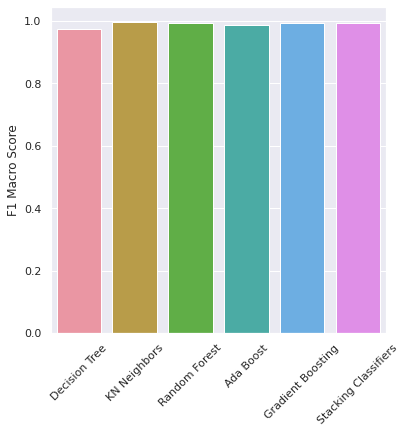

In [ ]:

classifier_names = ['Decision Tree', 'KN Neighbors', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'Stacking Classifiers']


sns.color_palette("deep")

g4 = sns.barplot(x = classifier_names, y = f1_score_list)

g4.set( ylabel='F1 Macro Score')

plt.xticks(rotation = '45')

## Wine Quality Modeling

## Evaluate different Models

In [ ]:
from sklearn.preprocessing import OneHotEncoder

wine_df_quality = wine_df.copy()
# # 1. Split data
# # 70% -> Training and cross validation
# # 30% -> Testing
y = wine_df_quality["quality"]
X = wine_df_quality
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

wine_num_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(numerical)),
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", MinMaxScaler())
])

wine_cat_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(categorical)),
    ("one_hot_encoder", OneHotEncoder())
])

full_pipeline_quality = ColumnTransformer([
    ("numerical", wine_num_pipeline, numerical),
    ("categorical", wine_cat_pipeline, categorical)
])

In [ ]:
def performGridSearchQuality(pipeline, params, scoring, X_tr_, y_tr_, X_te_, y_te_):
  grid = GridSearchCV(pipeline, params, cv=5, scoring=scoring)
  grid.fit(X_tr_, y_tr_)

  print('Best score', grid.best_score_)
  print('Best params', grid.best_params_)

  y_pred = grid.best_estimator_.predict(X_te_)

  print(classification_report(y_te_, y_pred))

### SVC

In [ ]:
svc_param_dist = {
    'svcclf__kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'svcclf__gamma': ['auto'],
}

svc = svm.SVC()

svcpipe = Pipeline([
    ('full_pipeline', full_pipeline_quality),
    ('svcclf', svc)
])

svcpipe.fit(X_tr, y_tr)

performGridSearchQuality(svcpipe, svc_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.7013696227836055
Best params {'svcclf__gamma': 'auto', 'svcclf__kernel': 'linear'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.91      1.00      0.95        63
           5       1.00      1.00      1.00       640
           6       1.00      1.00      1.00       862
           7       1.00      1.00      1.00       325
           8       1.00      1.00      1.00        54

    accuracy                           1.00      1950
   macro avg       0.82      0.83      0.83      1950
weighted avg       0.99      1.00      1.00      1950



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNNeighbors classifier

In [ ]:
knn_param_dist = {
    'knnclf__n_neighbors': [3, 4, 5, 6, 7],
    'knnclf__weights': ['uniform', 'distance'],
    'knnclf__metric': ['minkowski', 'euclidean', 'manhattan']
}

knn_clf = KNeighborsClassifier()
knnpipe = Pipeline([
    ('full_pipeline', full_pipeline_quality),
    ('knnclf', knn_clf)
])

knnpipe.fit(X_tr, y_tr)

performGridSearchQuality(knnpipe, knn_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.7391653774982171
Best params {'knnclf__metric': 'manhattan', 'knnclf__n_neighbors': 4, 'knnclf__weights': 'distance'}
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.96      0.71      0.82        63
           5       0.95      0.97      0.96       640
           6       0.97      0.98      0.98       862
           7       0.94      0.97      0.96       325
           8       0.95      0.70      0.81        54

    accuracy                           0.96      1950
   macro avg       0.96      0.75      0.80      1950
weighted avg       0.96      0.96      0.96      1950



### Random Forest Classifier

In [ ]:
rf_param_dist = {
    "rfclf__n_estimators": [100, 110, 120], 
    "rfclf__max_leaf_nodes": [None, 1]
}

rdn_clf = RandomForestClassifier()

rdnpipe = Pipeline([
    ('full_pipeline', full_pipeline_quality),
    ('rfclf', rdn_clf)
])

rdnpipe.fit(X_tr, y_tr)

performGridSearchQuality(rdnpipe, rf_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/p

Best score 0.731489103166792
Best params {'rfclf__max_leaf_nodes': None, 'rfclf__n_estimators': 100}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.91      0.98      0.95        63
           5       1.00      1.00      1.00       640
           6       1.00      1.00      1.00       862
           7       0.99      1.00      1.00       325
           8       1.00      0.94      0.97        54

    accuracy                           0.99      1950
   macro avg       0.82      0.82      0.82      1950
weighted avg       0.99      0.99      0.99      1950



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ada Boost Classifier

In [ ]:
ada_param_dist = {
    "adaclf__n_estimators": [200, 300, 400], 
    "adaclf__algorithm": ["SAMME", "SAMME.R"],
    "adaclf__learning_rate": [0.8, 1.0, 1.2]
}

clf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(clf)

adapipe = Pipeline([
    ('full_pipeline', full_pipeline_quality),
    ('adaclf', ada_clf)
])

adapipe.fit(X_tr, y_tr)

performGridSearchQuality(adapipe, ada_param_dist, 'f1_macro', X_tr, y_tr, X_te, y_te)

Best score 0.5619630606548728
Best params {'adaclf__algorithm': 'SAMME', 'adaclf__learning_rate': 1.2, 'adaclf__n_estimators': 300}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        63
           5       0.91      1.00      0.95       640
           6       1.00      1.00      1.00       862
           7       1.00      1.00      1.00       325
           8       1.00      1.00      1.00        54

    accuracy                           0.96      1950
   macro avg       0.65      0.67      0.66      1950
weighted avg       0.94      0.96      0.95      1950



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Stacking Classifier

In [ ]:
# Models with the best parameters from previous tunning

svc_clf = svm.SVC(kernel='linear', gamma='auto')
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
rdn_clf = RandomForestClassifier(max_leaf_nodes=None, n_estimators=100)
ada_clf = AdaBoostClassifier(clf, algorithm='SAMME', learning_rate=1.2, n_estimators=300)
logreg_clf = LogisticRegression()

models = [
    ('svc', svc_clf),
    ('knn', knn_clf),
    ('rnd', rdn_clf),
    ('ada', ada_clf)
]

sclf = StackingClassifier(estimators=models, final_estimator=logreg_clf, cv=5)

classifiers_quality = {
    "SVC": svc_clf,
    "KNN": knn_clf,
    "RDN": rdn_clf,
    "ADA": ada_clf,
    "STCLF": sclf}

In [ ]:
for key in classifiers_quality:
    classifier = classifiers_quality[key]
    pipe = Pipeline([
      ('full_pipeline', full_pipeline_quality),
      (key, classifiers_quality[key])
    ])
    classifiers_quality[key] = pipe


In [ ]:
# Train classifiers
for key in classifiers_quality:
    classifier = classifiers_quality[key]
    classifier.fit(X_tr, y_tr)
    classifiers_quality[key] = classifier

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Making predictions

results_quality = pd.DataFrame()
for key in classifiers_quality:
    y_pred = classifiers_quality[key].predict(X_te)
    results_quality[f"{key}"] = y_pred

results_quality["target"] = y_te

## F1 Score for all classifiers

In [ ]:


f1_score_sq_list = []

for key, counter in zip(classifiers_quality, range(5)):
    y_pred = results_quality[key]
    
    f1 = metrics.f1_score(y_te, y_pred, average='macro')

    f1_score_sq_list.append(f1)
    
    textstr = f"F1: {f1:.3f}"

    print(key, 'Classifier')
    print(textstr, 'F1 Macro Score')

SVC Classifier
F1: 0.826 F1 Score
KNN Classifier
F1: 0.801 F1 Score
RDN Classifier
F1: 0.870 F1 Score
ADA Classifier
F1: 0.659 F1 Score
STCLF Classifier
F1: 0.964 F1 Score


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

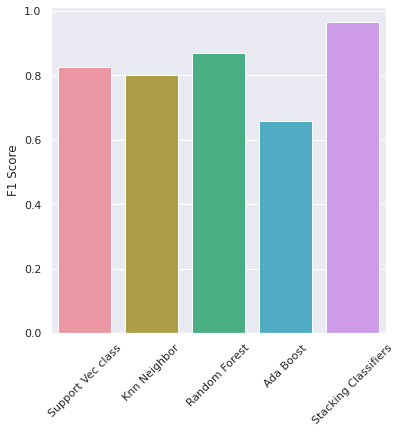

In [ ]:

classifier_names_wq = ['Support Vector', 'KN Neighbor', 'Random Forest', 'Ada Boost', 'Stacking Classifiers']

sns.color_palette("deep")
g5 = sns.barplot(x = classifier_names_wq, y = f1_score_sq_list)
g5.set( ylabel='F1 Macro Score')
plt.xticks(rotation = '45')